In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [62]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
tips = pd.get_dummies(tips, drop_first=True)
tips.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


In [64]:
X = tips.drop('tip', axis = 1)
y = tips['tip']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train.min(), X_train.max(), X_train.std()

(-1.6779213337906433, 3.650981924990715, 1.0)

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

C:\Users\Hassan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10.7564 - mae: 2.9210  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 5.9275 - mae: 2.1169
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5569 - mae: 1.7206 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 2.8315 - mae: 1.2564
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.7500 - mae: 0.9973
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 1.2567 - mae: 0.8669
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2038 - mae: 0.8383 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3356 - mae: 0.8845 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 1.1240 - mae: 0.8211
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0764 - mae: 0.7920 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1268 - mae: 0.8204 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1327 - mae: 0.7995 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [70]:
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])
print('Mean Absolute Error: ', loss[1])


Mean Squared Error:  1.1705513000488281
Mean Absolute Error:  0.8206799626350403


In [71]:
loss

[1.1705513000488281, 0.8206799626350403]

Epoch 1/100


C:\Users\Hassan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 10.3709 - val_loss: 5.7803
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7312 - val_loss: 4.0709
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0635 - val_loss: 2.7547
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8201 - val_loss: 1.8726
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9491 - val_loss: 1.3936
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5479 - val_loss: 1.2387
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9133 - val_loss: 1.2315
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8875 - val_loss: 1.2481
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4543 - val_loss: 1.1566
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6946 - val_loss: 1.0954
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5828 - val_loss: 1.0655
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3997 - val_loss: 1.0647
Epoch 13/10

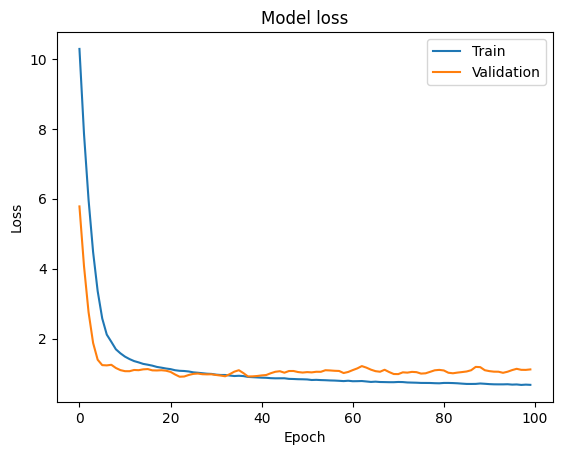

In [72]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [73]:
# print values of history
print(history.history.keys())


dict_keys(['loss', 'val_loss'])


In [74]:
history.history

{'loss': [10.286528587341309,
  7.854887008666992,
  5.9707207679748535,
  4.472219944000244,
  3.356520414352417,
  2.5753982067108154,
  2.1123085021972656,
  1.9055047035217285,
  1.6911622285842896,
  1.5762128829956055,
  1.4814504384994507,
  1.4114189147949219,
  1.3543062210083008,
  1.316927433013916,
  1.2738763093948364,
  1.2506649494171143,
  1.2238795757293701,
  1.187359094619751,
  1.1659455299377441,
  1.1419646739959717,
  1.124078631401062,
  1.0924336910247803,
  1.0764445066452026,
  1.0705757141113281,
  1.0571117401123047,
  1.031866431236267,
  1.0206830501556396,
  1.0067534446716309,
  0.9929978847503662,
  0.9870838522911072,
  0.9663289189338684,
  0.9567891955375671,
  0.956557035446167,
  0.9408212304115295,
  0.926858127117157,
  0.933864176273346,
  0.9251136779785156,
  0.9015117883682251,
  0.8940364718437195,
  0.8874139189720154,
  0.8798652291297913,
  0.8761364817619324,
  0.8656934499740601,
  0.8611761927604675,
  0.8620624542236328,
  0.86269897

## Early Stopping

Epoch 1/100


C:\Users\Hassan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.1582 - val_loss: 4.6682
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1832 - val_loss: 3.2772
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9375 - val_loss: 2.1262
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3753 - val_loss: 1.3168
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6767 - val_loss: 0.8739
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8791 - val_loss: 0.7710
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6238 - val_loss: 0.8416
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5264 - val_loss: 0.9518
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3924 - val_loss: 0.9606
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1358 - val_loss: 0.9547
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1500 - val_loss: 0.9555
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1956 - val_loss: 1.0055
Epoch 13/100

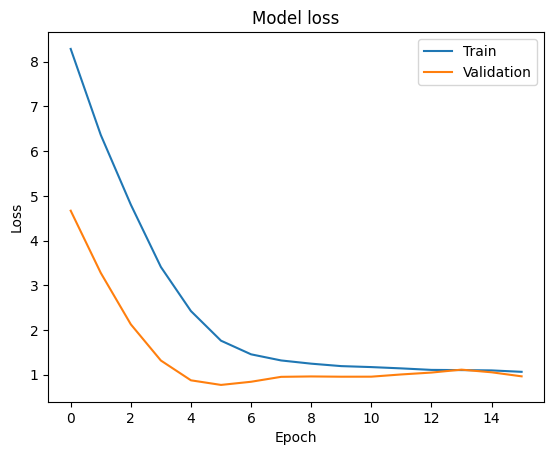

In [79]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(patience=10)

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()